In [1]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
  h2 {
    font-size: var(--jp-content-font-size4);
    background-color: #FF0000 ;
    color: yellow;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 150px 70px 150px 70px;
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(255, 255, 0, 0.5), 0 6px 6px rgba(215, 215, 0, 0.5);
        }
</style>
''')

## Simple Introduce :

* This unstructured Data loaded from Kaggle . 

* I used Deep learning Techniques by using tensorflow pkgs .

* I divide Data into train set & validatio set after loading the data.

* I used ImageDataGenerator for preprocessing the Data .

## About Dataset: 

* The Cats and Dogs Classification dataset is a widely used benchmark dataset in the field of computer vision.

* It consists of thousands of images of cats and dogs, with each image labeled as either a cat or a dog.

* This dataset serves as a fundamental resource for training and evaluating machine learning models for image classification tasks.

* Researchers and practitioners leverage this dataset to develop and test algorithms that can accurately distinguish between images of cats and dogs, contributing to advancements in computer vision technology.





## imports :

In [2]:
# imports :
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras import models
from tensorflow.keras.layers import Dense , Flatten , Conv2D ,MaxPooling2D
from tensorflow .keras.preprocessing.image import ImageDataGenerator

2024-08-03 20:28:58.078312: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-03 20:28:58.080124: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 20:28:58.113686: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 20:28:58.114505: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-03 20:28:58.709628: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## preparing & loading the data :

In [3]:
# Dowanload the data (cat & dogs):
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-08-03 20:28:59--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.37.59, 172.217.21.27, 172.217.171.251, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.37.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   132KB/s    in 6m 5s   

2024-08-03 20:35:05 (183 KB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
# to unzip the file:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [5]:
def create_dataset(path):
  images_path=[]
  images_label=[]
  for dir in os.listdir(path):
    for file in os.listdir(os.path.join(path, dir)):
      images_path.append(os.path.join(path, dir, file))
      image_label = 0 if dir=="cats" else 1
      images_label.append(image_label)
  return images_path, images_label


In [6]:
image_train,label_train=create_dataset("cats_and_dogs_filtered/train")
image_test,label_test=create_dataset("cats_and_dogs_filtered/validation")
print(f"image_train_shape:{np.shape(image_train)}\n label_train_shape:{np.shape(label_train)}")
print(f"image_test_shape:{np.shape(image_test)}\n label_test_shape:{np.shape(label_test)}")

image_train_shape:(2000,)
 label_train_shape:(2000,)
image_test_shape:(1000,)
 label_test_shape:(1000,)


In [7]:
image_train[1:10]

['cats_and_dogs_filtered/train/dogs/dog.107.jpg',
 'cats_and_dogs_filtered/train/dogs/dog.489.jpg',
 'cats_and_dogs_filtered/train/dogs/dog.306.jpg',
 'cats_and_dogs_filtered/train/dogs/dog.913.jpg',
 'cats_and_dogs_filtered/train/dogs/dog.793.jpg',
 'cats_and_dogs_filtered/train/dogs/dog.325.jpg',
 'cats_and_dogs_filtered/train/dogs/dog.862.jpg',
 'cats_and_dogs_filtered/train/dogs/dog.543.jpg',
 'cats_and_dogs_filtered/train/dogs/dog.359.jpg']

In [8]:
label_train[2]

1

##  Agumention :

In [9]:
# function that read the image & conver into jpeg:

def get_image_tensor_from_path(image_path,label):
    image=tf.io.read_file(image_path)
    image=tf.image.decode_jpeg(image)
    image=tf.image.convert_image_dtype(image,tf.float32)
    image=tf.image.resize(image,(244,244))


    return image , label

In [10]:
# function to change from brightness or reloation of the image :
def agument(image,label):
    image=tf.image.random_brightness(image,max_delta=32.0/255.0) # change from brightness of image

    image=tf.image.random_flip_left_right(image) # change from position of image

    image=tf.image.random_flip_up_down(image)

    image=tf.image.random_saturation(image,lower=500000,upper=1000000)      # to change preentage of color in image


    return image , label

In [11]:
def cd_dataset(x,y,batch_size=32,training=False):
    data=tf.data.Dataset.from_tensor_slices((x,y))

    data=data.map(get_image_tensor_from_path,num_parallel_calls=tf.data.experimental.AUTOTUNE)

    if training:

        data=data.map(agument,num_parallel_calls=tf.data.experimental.AUTOTUNE)

        data=data.shuffle(2000)

        data=data.batch(batch_size)

        data=data.prefetch(tf.data.experimental.AUTOTUNE)

        return data

In [12]:
train_dataset=cd_dataset(image_train,label_train,training=True)
test_dataset=cd_dataset(image_test,label_test)

2024-08-03 20:35:05.881062: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-08-03 20:35:05.881082: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: abdalrahman-Dell-G15-5511
2024-08-03 20:35:05.881087: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: abdalrahman-Dell-G15-5511
2024-08-03 20:35:05.881155: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 470.256.2
2024-08-03 20:35:05.881164: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 470.256.2
2024-08-03 20:35:05.881167: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 470.256.2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

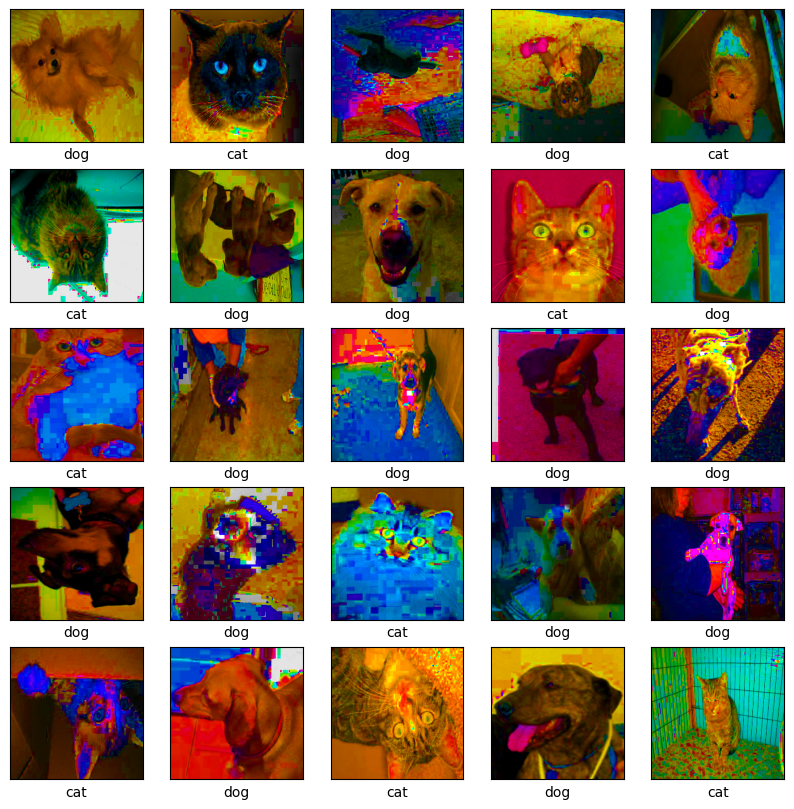

In [13]:
class_names=["cat","dog"]

for x,y in train_dataset.take(1):

    plt.figure(figsize=(10,10))

    for i in range (25):

        plt.subplot(5,5,i+1)
        plt.imshow(x[i])

        plt.xticks([])
        plt.yticks([])

        plt.xlabel(class_names[y[i]])

## Data  Preprocessing :

In [14]:
# preprocessing the data :
def reshape_and_normalize(images):
     # reshape :
    images=images.reshape(images.reshape[0],images.reshape[1],images.reshape[2],1)
    
    #Normalize :
    images=images/255
    return images



In [15]:
# Data Generator :
train_dir = "cats_and_dogs_filtered/train"
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary' 
)

validation_dir="cats_and_dogs_filtered/validation"
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary' 
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Bulding Model :

In [16]:
# Bulding the model :

model=tf.keras.models.Sequential([
    Conv2D(16,(3,3),activation="relu",input_shape=(300,300,3)),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,activation="relu"),
    Dense(1,activation="sigmoid"),
        ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [17]:
# Callback function:

class mycallback(tf.keras.callbacks.Callback):

    def one_epoch_end(self,epoch,logs={}):
        if(logs.get("accuracy")>0.995):
            print("/n Stop trining :")
            self.model.stop_training=True

In [18]:
# RMSprop optimizer:

from tensorflow.keras.optimizers import RMSprop

model.compile(
    
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=0.001),  
    metrics=["accuracy"]
)

callbacks=mycallback()

# Training the model:

print("\n Model Training :")

history=model.fit(
train_generator,
steps_per_epoch=8,
epochs=50,
validation_data=test_generator,
validation_steps=8,
verbose=2,callbacks=[callbacks])



 Model Training :
Epoch 1/50
8/8 - 11s - loss: 1.1302 - accuracy: 0.4922 - val_loss: 0.6931 - val_accuracy: 0.4970 - 11s/epoch - 1s/step
Epoch 2/50
8/8 - 11s - loss: 0.6926 - accuracy: 0.5039 - val_loss: 0.6917 - val_accuracy: 0.5000 - 11s/epoch - 1s/step
Epoch 3/50
8/8 - 11s - loss: 0.6918 - accuracy: 0.5098 - val_loss: 0.6946 - val_accuracy: 0.5000 - 11s/epoch - 1s/step
Epoch 4/50
8/8 - 11s - loss: 0.6928 - accuracy: 0.5430 - val_loss: 0.6890 - val_accuracy: 0.4990 - 11s/epoch - 1s/step
Epoch 5/50
8/8 - 11s - loss: 0.6957 - accuracy: 0.5113 - val_loss: 0.6893 - val_accuracy: 0.6070 - 11s/epoch - 1s/step
Epoch 6/50
8/8 - 11s - loss: 0.6932 - accuracy: 0.5195 - val_loss: 0.6933 - val_accuracy: 0.5000 - 11s/epoch - 1s/step
Epoch 7/50
8/8 - 11s - loss: 0.6927 - accuracy: 0.5102 - val_loss: 0.6903 - val_accuracy: 0.5240 - 11s/epoch - 1s/step
Epoch 8/50
8/8 - 11s - loss: 0.6846 - accuracy: 0.5451 - val_loss: 0.7011 - val_accuracy: 0.5000 - 11s/epoch - 1s/step
Epoch 9/50
8/8 - 12s - loss: 

Enter image path:  img5.jpg


1/1 [==============================] - 0s 16ms/step
[0.9558453]
img5.jpg is a dog


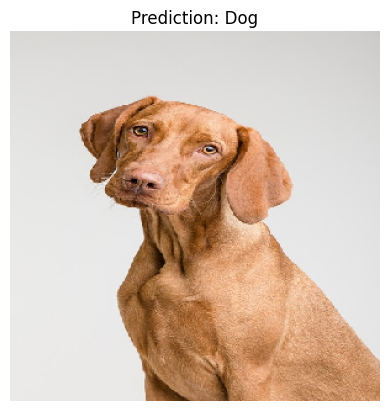

In [38]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Assuming `model` is your trained model
# Load the model here if it's not already loaded

# Get the image path from the user
path = input("Enter image path: ")

# Check if the file exists
if not os.path.isfile(path):
    print("The specified file does not exist.")
else:
    # Load the image
    img = load_img(path, target_size=(300, 300))
    x = img_to_array(img)
    x /= 255.0
    
    # Expand dimensions to match the model's input shape
    x = np.expand_dims(x, axis=0)
    
    # Predict the class
    classes = model.predict(x, batch_size=1)
    
    # Print the predicted class
    print(classes[0])
    if classes[0] > 0.5:
        print(f"{os.path.basename(path)} is a dog")
    else:
        print(f"{os.path.basename(path)} is a cat")

    # Display the image
    plt.imshow(img)
    plt.title(f"Prediction: {'Dog' if classes[0] > 0.5 else 'Cat'}")
    plt.axis('off')
    plt.show()

In [20]:
# Evalute on the test set:

print("\n Model Evaluation :")
test_loss = model.evaluate(test_generator, verbose=2)
print(test_loss)


 Model Evaluation :
8/8 - 3s - loss: 1.0150 - accuracy: 0.6660 - 3s/epoch - 373ms/step
[1.015008807182312, 0.6660000085830688]


In [21]:
print("\n Model Prediction :")
y_predict=model.predict(test_generator)
y_predict[:10]



 Model Prediction :
8/8 [==============================] - 3s 368ms/step


array([[8.0395381e-05],
       [2.8755569e-01],
       [7.4257892e-01],
       [8.6842227e-01],
       [5.7534939e-01],
       [4.0566857e-04],
       [8.2318836e-01],
       [1.4509777e-02],
       [5.4269359e-03],
       [2.2462734e-03]], dtype=float32)

In [22]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_predict)} \n the max_value for prediction --->>> {np.max(y_predict)} ")

the min_value for prediction --->> 1.2332101562151365e-07 
 the max_value for prediction --->>> 0.9999945163726807 


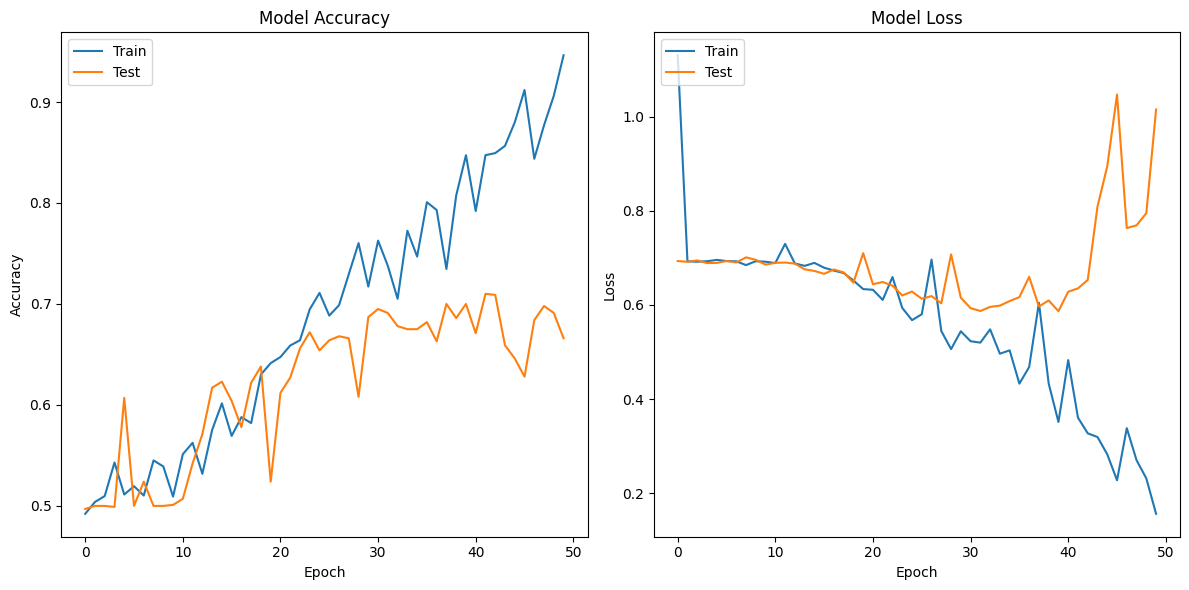

In [25]:
# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## End project 

* Devloper : AbdalRahman Gameel Ahmed Hebishy

* if you find my Notebook useful upvote me & Leave a comment if you have any Question

* Kaggle works : https://www.kaggle.com/work
   